#### Importing some important libraries

In [1]:
# import key packages – required:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import scipy.stats as st
import statistics as stats
import seaborn as sns
import pandas as pd
from scipy.stats import gaussian_kde
from scipy.stats import kurtosis

## 1. Task

1. Both male and female csv files have been downloaded from GitHub and stored in the same location as this python file.

<b>Please ensure the source data files are in the same location as this python file.</b>

2. Now we will use loadtxt function of the numpy to load the csv data into a numpy matrix called as female and male respectively

In [2]:
female = np.loadtxt('nhanes_adult_female_bmx_2020.csv',dtype=float,\
                    skiprows=19,delimiter=",")
male = np.loadtxt('nhanes_adult_male_bmx_2020.csv',dtype=float,\
                  skiprows=19,delimiter=",")

Since there are 19 rows in the begining which are of no relavance for reading the data, we are setting skiprows parameter as 19. loadtxt will read data from 20th row onwards.

3. We need to plot 2 separate histograms, one for female weights and another one for male weights (male sub-figure below the female sub-figure). We also need to have the same x-axis limits for both the sub-figures.

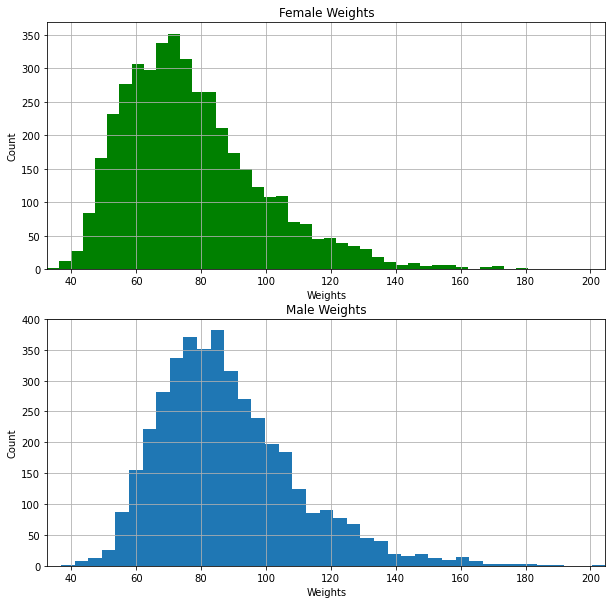

In [3]:
female_weights = female[:,0]
male_weights = male[:,0]

plt.figure(figsize=(10, 10))

min_female_weights = np.min(female_weights)
max_female_weights = np.max(female_weights)
min_male_weights = np.min(male_weights)
max_male_weights = np.max(male_weights)

plt.subplot(211)
plt.hist(female_weights,bins=40, facecolor='g')
plt.title("Female Weights")
plt.xlabel("Weights")
plt.ylabel("Count")
plt.xlim(min(min_female_weights,min_male_weights),\
         max(max_female_weights,max_male_weights))
plt.grid(True)

# Plotting Male weights below Female weights histogram
plt.subplot(212)
plt.hist(male_weights,bins=40)
plt.title("Male Weights")
plt.xlabel("Weights")
plt.ylabel("Count")
plt.xlim(min(min_female_weights,min_male_weights),\
         max(max_female_weights,max_male_weights))
plt.grid(True)

Since we need to show only weights distribution for both the female and male, we are storing the values from column index 0 of female and weight variable into female_weight and male_weight. We are also showing both the charts in the same plot. In order to do that, we have called subplot method and passed respective row, column and index value. For e.g. plt.subplot(211) produces a subaxes in a figure which represents the top plot (i.e. the first) in a 2 row by 1 column notional grid. Apart from the this, we need to display x-axis limits identical for both the sub-figures. For that, we have first stored min. and max. values of both female and male weights, and then passing minimum of min_female_weights and min_male_weights and maximum of max_female_weights and max_male_weights into xlim method.

Both the above histograms are <b>right skewed</b>. In comparison to male weights, female weights are slighty more skewed which only proves the point (in the real world) that the females are less heavier than their male counter-parts. Also, large part of female weights are distrubuted between 50 and 90, whereas for males, it is distributed between 60 and 100.

4. Next we are going to plot box-and-whisker plots for female and male weights side by side in one single chart.

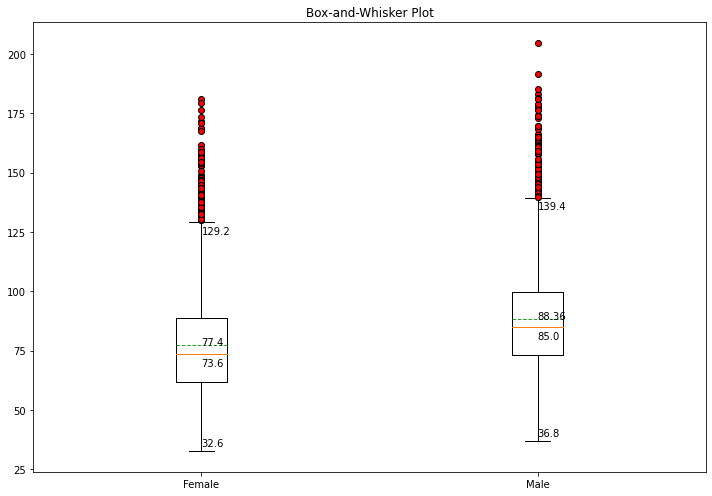

In [4]:
# Dictionary for setting the outlier color and shape
red_circle = dict(markerfacecolor='red',marker='o')

labels = ['Female','Male']

plt.figure(figsize=(10, 7))
ax = plt.boxplot(x=[female_weights,male_weights], showfliers=True, \
                 flierprops=red_circle, meanline=True, showmeans=True, \
                 labels = labels)

medians = [item.get_ydata()[0] for item in ax['medians']]
means = [item.get_ydata()[0] for item in ax['means']]

minimums = [round(item.get_ydata()[0], 1) for item in ax['caps']][::2]
maximums = [round(item.get_ydata()[0], 1) for item in ax['caps']][1::2]


# Displaying median values
plt.text(x=1,y=medians[0]-5,s=medians[0])
plt.text(x=2,y=medians[1]-5,s=medians[1])

# Displaying mean values
plt.text(x=1,y=means[0],s=round(means[0],2))
plt.text(x=2,y=means[1],s=round(means[1],2))

# Displaying minimum values
plt.text(x=1,y=minimums[0]+2,s=round(minimums[0],2))
plt.text(x=2,y=minimums[1]+2,s=round(minimums[1],2))


# Displaying maximum values
plt.text(x=1,y=maximums[0]-5,s=round(maximums[0],2))
plt.text(x=2,y=maximums[1]-5,s=round(maximums[1],2))


plt.title("Box-and-Whisker Plot")

plt.tight_layout()

In the above plot, we have plotted 2 box-and-whisker plots for female and male weights, side-by-side by passing female_weights and male_weights as a list in the boxplot method. We have displayed the outliers (<b>red circles</b>) as well as the mean line (<b>green dotted lines</b>). Visually looking at the box plot, 50% of the female weights are lying between 60 and 90 (approximately) whereas it is 70 and 100 (approximately) for males. Anything above 129.2 kg for females and 139.4 kg for males is an outlier. We have also displayed minimum, maximum, mean and median values for both the female and male weights by reading the data from <b>ax</b> dictionary object.

5. We need to display important measures of location such as mean, median, and mode; measures of dispersion: standard deviation, IQR, minimum, and maximum; measures of shape: skewness, and kurtosis for both female and male weights.

In [5]:
print("Measures of Location:----")
print(f'Female Weights - Mean: {round(np.mean(female_weights),2)}, \
Median: {np.median(female_weights)},and Mode: {stats.mode(female_weights)}.')
print(f'Male Weights - Mean: {round(np.mean(male_weights),2)}, \
Median: {np.median(male_weights)}, and Mode: {stats.mode(male_weights)}.')

print("\nMeasures of Dispersion:----")
print(f'Female Weights - Standard Deviation: {round(np.std(female_weights),2)}, \
IQR: {np.quantile(female_weights, 0.75)-np.quantile(female_weights, 0.25)}, \
Minimum: {np.min(female_weights)}, and Maximum: {np.max(female_weights)}.')
print(f'Male Weights - Standard Deviation: {round(np.std(male_weights),2)}, \
IQR: {np.quantile(male_weights, 0.75)-np.quantile(male_weights, 0.25)}, \
Minimum: {np.min(male_weights)}, and Maximum: {np.max(male_weights)}.')

print("\nMeasures of Shape:----")
print(f'Female Weights - Skewness: {st.skew(female_weights)}, \
Kurtosis (Fisher): {kurtosis(female_weights, fisher = True)}, \
and Kurtosis (Pearson): {kurtosis(female_weights, fisher = False)}.')
print(f'Male Weights - Skewness: {st.skew(male_weights)}, \
Kurtosis (Fisher): {kurtosis(male_weights, fisher = True)}, \
and Kurtosis (Pearson): {kurtosis(male_weights, fisher = False)}.')



Measures of Location:----
Female Weights - Mean: 77.4, Median: 73.6,and Mode: 75.8.
Male Weights - Mean: 88.36, Median: 85.0, and Mode: 79.0.

Measures of Dispersion:----
Female Weights - Standard Deviation: 21.54, IQR: 27.1, Minimum: 32.6, and Maximum: 180.9.
Male Weights - Standard Deviation: 21.42, IQR: 26.5, Minimum: 36.8, and Maximum: 204.6.

Measures of Shape:----
Female Weights - Skewness: 1.03336107186799, Kurtosis (Fisher): 1.4009683480659731, and Kurtosis (Pearson): 4.400968348065973.
Male Weights - Skewness: 0.9842810741662347, Kurtosis (Fisher): 1.4742884754078238, and Kurtosis (Pearson): 4.474288475407824.


Typically in a right skewed distribution, mean is always greater than median and mode which we can see above in Measure of Location calculation. Since the histograms that we have plotted as part of Q3 are not normal distribution (visually we can say that), mean is not an accurate measure as it tends to include all the data points (or simply stated it gets affected by outliers). If we look at the median, it tends to ignore the values on left and right side of the distributions. And we can actually use median for not so symmetric distributions which we have in our case. 50% of the female weights are less than 73.6 kgs (median value for female weights) whereas 50% are above 73.6 kgs. Similarly, 50% of males are above 85 kgs whereas 50% are less than 85 kgs.


Positive skewness tends to points towards heavier right tailed distrubution (confirmed by Kurtosis value above which is positive) which is the case for both female and male weights. Since Kurtosis (Pearson) value > 3 for both female and male weights, peak will be higher and is also known as leptokurtic distribution.

6. Next, we need to calculate the BMIs of females by adding the BMI column at the last.

In [6]:
female_bmi_array = []
female_bmi_array = np.array(female[:,0] / ((female[:,1] / 100)**2))
female = np.insert(female, 7, female_bmi_array, axis = 1)

BMI formula is weight / height (in m) ^ 2. Since weight is in column index 0 and height (in cm) is in column index 1, we are computing the BMI values (we are dividing height by 100 since it is in cm) for each row and storing it in an array and then inserting it in the column index 7 (or 8th column) of female array.

7. We need to create a new matrix by standardizing all the columns of female (including bmi column). For this we will apply z-score formula. Z-score will tell how much a value differs from the standard deviation.

In [7]:
zfemale = st.zscore(female)

We simply need to pass female variable to zscore function to get a new zscore matrix.

8. Now we need to plot a scatterplot (pairplot) to compare 2 variables with each other. In this case, we have to complare weight, standing height, hip circumference, waist circumference and BMI only. We also need to compute Pearson's and Spearman's correlation coefficient for all pair of variables (just the 5 mentioned before). 

There are 2 approaches to calculate both the coefficient(s):

a. By doing double for loop on a subset of zfemale matrix

b. Converting the zfemale array to a dataframe object and then calling corr method of pandas dataframe.

I am showing both the approaches and in both the cases, value for 2 variables should be same.

## Pairplot

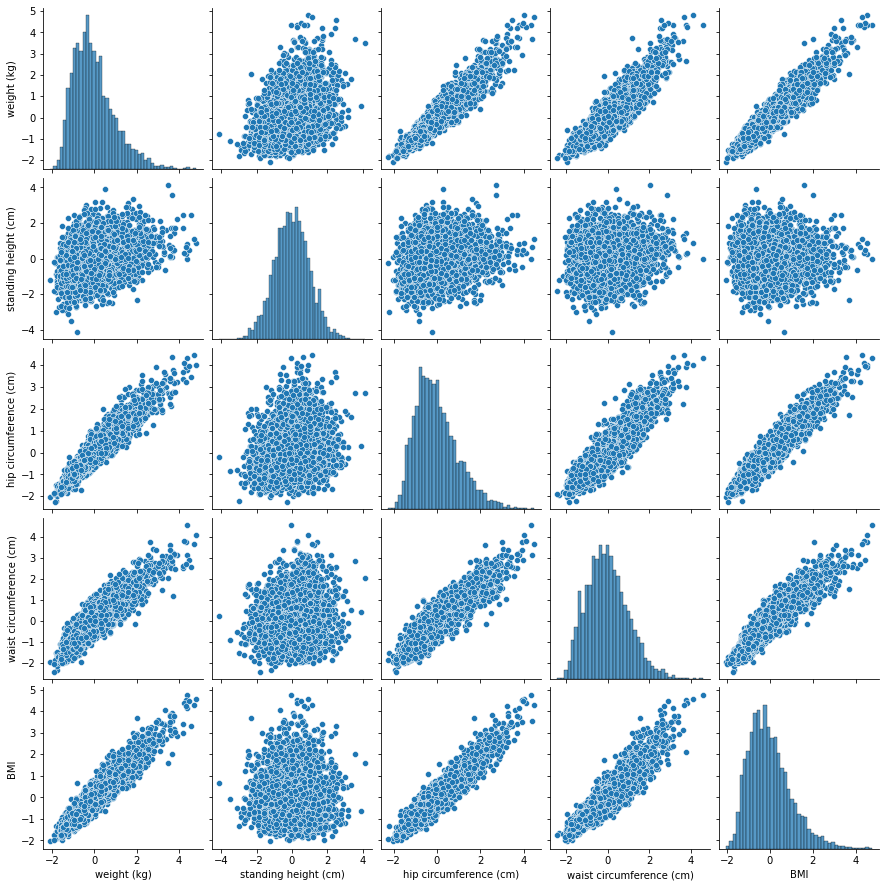

In [8]:
sns.pairplot(pd.DataFrame(zfemale[:,[0,1,5,6,7]],\
                          columns=["weight (kg)", "standing height (cm)", \
                                   "hip circumference (cm)", "waist circumference (cm)",\
                                   "BMI"]), kind="scatter", diag_kind='auto')

In the above chart, the histogram plot shows the distribution of a single variable whereas the scatter plot shows the relationship (or lack off) between 2 variables. As we can see in the first row, weight has a strong relationship with hip, waist and BMI variables (as weight increases all the 3 variables increase) but same is not true with height. Similarly, in the 2nd row, height doesn't have strong relationship with weight, hip, waist and BMI variables.

## Approach 1

In [9]:
no_cols = 5 # Total number of columns to consider 
pearson_coeff = [] # Array for storing the pearson coeff values
spearman_coeff = [] # Array for storing spearman coeff values

# zfemale_five for storing the values of the required columns (i.e indexes) 
# from zfemale array
zfemale_five = zfemale[:,[0,1,5,6,7]] 
for i in range(no_cols):
    col1 = []
    col2 = []
    for j in range(no_cols):
        col1.append(st.pearsonr(zfemale_five[:,i],zfemale_five[:,j])[0])
        col2.append(st.spearmanr(zfemale_five[:,i],zfemale_five[:,j])[0])
    pearson_coeff.append(col1)
    spearman_coeff.append(col2)

pearson_coeff = np.array(pearson_coeff)
spearman_coeff = np.array(spearman_coeff)

### Pearson correlation coeffiecient

<AxesSubplot:>

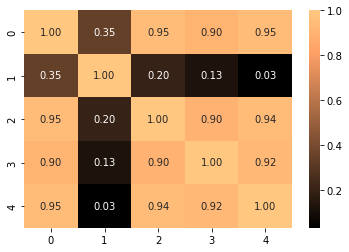

In [10]:
sns.heatmap(pearson_coeff,annot=True, fmt=".2f", \
            cmap=cm.get_cmap("copper"))

### Spearman correlation coeffiecient

<AxesSubplot:>

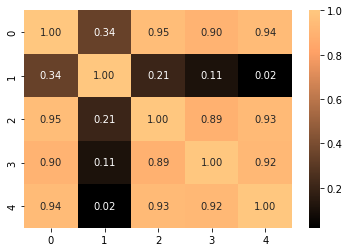

In [11]:
sns.heatmap(spearman_coeff,annot=True, fmt=".2f", \
            cmap=cm.get_cmap("copper"))

## Approach 2

### Pearson correlation coeffiecient

In [12]:
zfemale_df = pd.DataFrame(zfemale[:,[0,1,5,6,7]], \
                          columns=["weight (kg)", "standing height (cm)", \
                            "hip circumference (cm)", \
                            "waist circumference (cm)", "BMI"])
zfemale_df.corr(method='pearson')

,weight (kg),standing height (cm),hip circumference (cm),waist circumference (cm),BMI
weight (kg),1.000000,0.345496,0.946553,0.904550,0.945900
standing height (cm),0.345496,1.000000,0.202895,0.126547,0.033077
hip circumference (cm),0.946553,0.202895,1.000000,0.897407,0.944199
waist circumference (cm),0.904550,0.126547,0.897407,1.000000,0.921198
BMI,0.945900,0.033077,0.944199,0.921198,1.000000


<AxesSubplot:>

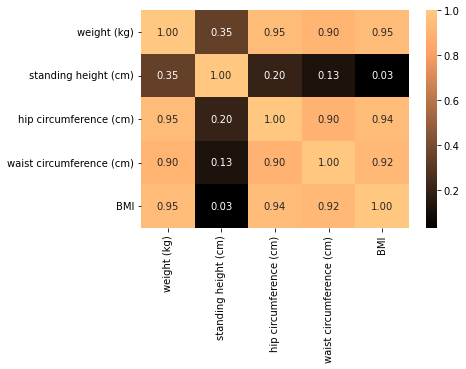

In [13]:
sns.heatmap(zfemale_df.corr(method='pearson'),annot=True, fmt=".2f", \
            cmap=cm.get_cmap("copper"))

### Spearman correlation coeffiecient

In [14]:
zfemale_df = pd.DataFrame(zfemale[:,[0,1,5,6,7]], \
                          columns=["weight (kg)", "standing height (cm)", \
                                   "hip circumference (cm)", \
                                   "waist circumference (cm)", "BMI"])
zfemale_df.corr(method='spearman')

,weight (kg),standing height (cm),hip circumference (cm),waist circumference (cm),BMI
weight (kg),1.000000,0.338860,0.946634,0.900169,0.937999
standing height (cm),0.338860,1.000000,0.205405,0.108587,0.019897
hip circumference (cm),0.946634,0.205405,1.000000,0.888037,0.934196
waist circumference (cm),0.900169,0.108587,0.888037,1.000000,0.923114
BMI,0.937999,0.019897,0.934196,0.923114,1.000000


<AxesSubplot:>

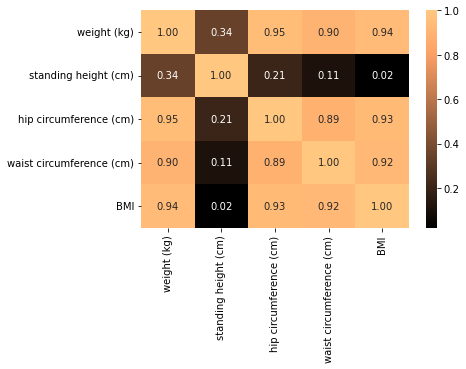

In [15]:
sns.heatmap(zfemale_df.corr(method='spearman'),annot=True, fmt=".2f", \
            cmap=cm.get_cmap("copper"))

As discussed above, we have taken 2 appoaches to calculate pearson and spearman's correlation coefficient.

In approach 1, we know the number of columns (i.e. 5) in the array and specifically which columns index we require to compute the values, we simply do a double for loop over zfemale_five by comparing column 1 with column 2 to 5, column 2 with column 1, 3 to 5 and so on and call pearson and spearman functions of stats module and storing the values in intermediate arrays: col1 (for pearson) and col2 (for spearman) and finally appending them in pearson_coeff and spearman_coeff arrays. This approach is slightly lengthier as compared to approach second.

In approach 2, we simply convert the zfemale array to a DataFrame and call the corr() function and then set the method parameter as pearson or spearman.

We are also plotting the heatmap for plotting the correlation coefficient for both the approaches. In both the cases, it is quite evident which variables have weak correlation (brown and black cells represent that). 

If we compare weight with standing hip and waist circumference, they are highlighly correlated. What it means is that as the hip and waist size increases the weight also increases. Similarly, as the weight increases BMI also increases since after certain age height remains constant which is why height is less correlated with weight and has a weaker correlation with BMI. Similartly, hip and waist are also highly correlated to BMI and also to each other (but less than what it is with BMI and weight). 

## 2. Additional Tasks for Postgraduate

1. In this task we need to compute 2 additional formulas: waist to height ratio and waist to hip ratio for both female and male participants and add them in females and males matrices itself.

In [16]:
# Female
female_waist_to_height = []
female_waist_to_hip = []
female_waist_to_height = np.array(female[:,6] / female[:,1])
female_waist_to_hip = np.array(female[:,6] / female[:,5])
female = np.insert(female, 8, female_waist_to_height, axis = 1)
female = np.insert(female, 9, female_waist_to_hip, axis = 1)

In [17]:
# Male
male_waist_to_height = []
male_waist_to_hip = []
male_waist_to_height = np.array(male[:,6] / male[:,1])
male_waist_to_hip = np.array(male[:,6] / male[:,5])
male = np.insert(male, 7, male_waist_to_height, axis = 1)
male = np.insert(male, 8, male_waist_to_hip, axis = 1)

Since waist, height and hip are in cms, we don't need to do any conversion. We need to remember, female matrix has one additional column for BMI so waist to height and waist to hip will be added as column index 8 and 9 respectively. In male matrix, they will be added at column index 7 and 8. Columns getting appended are unitless since we are dividing cm by cm.

2.Next, we need to plot a box plot for female and male waist to height and waist to hip ratio in one single chart.

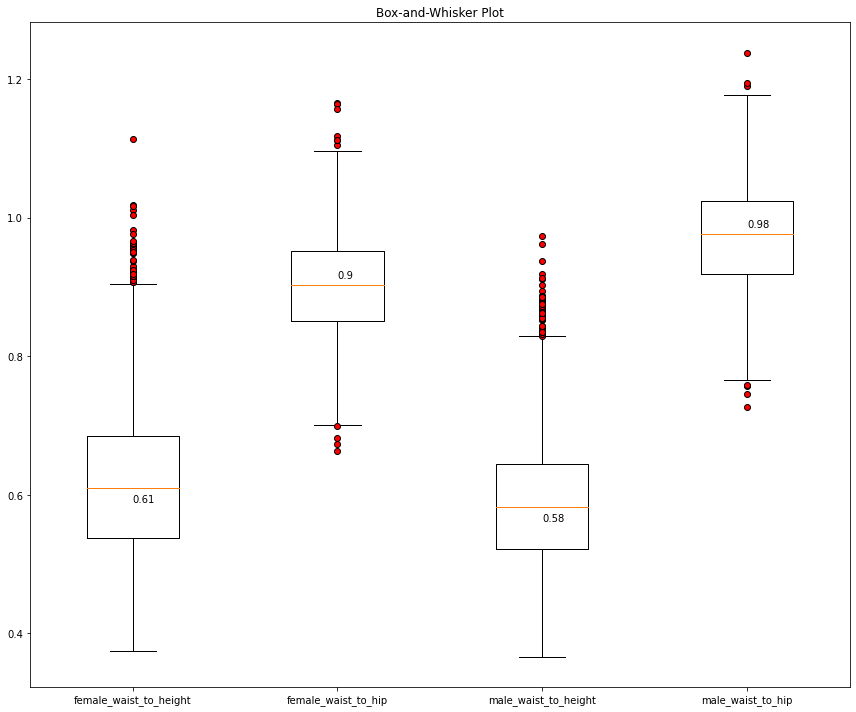

In [18]:
female_waist_to_height = female[:,8]
female_waist_to_hip = female[:,9]
male_waist_to_height = male[:,7]
male_waist_to_hip = male[:,8]

# Dictionary for setting the outlier color and shape
red_circle = dict(markerfacecolor='red',marker='o')

labels = ['female_waist_to_height','female_waist_to_hip',\
          'male_waist_to_height','male_waist_to_hip']

plt.figure(figsize=(12, 10))
ax = plt.boxplot(x=[female_waist_to_height,female_waist_to_hip,male_waist_to_height,\
                    male_waist_to_hip], showfliers=True, flierprops=red_circle, \
                    labels = labels)

medians = [item.get_ydata()[0] for item in ax['medians']]

# Displaying median values
plt.text(x=1,y=medians[0]-0.02,s=round(medians[0],2))
plt.text(x=2,y=medians[1]+0.01,s=round(medians[1],2))
plt.text(x=3,y=medians[2]-0.02,s=round(medians[2],2))
plt.text(x=4,y=medians[3]+0.01,s=round(medians[3],2))

plt.title("Box-and-Whisker Plot")


plt.tight_layout()

4 box-plots have been plotted in the same chart by passing them as list in the box plot function. We are also displaying the median values by reading its content through get_ydata() method for ax dictionary object and then passing it into plt.text function.

The median values for waist-to-height and waist-to-hip ratio for both sexes are greater than the prescribed threshold by WHO which should be less than 0.5 for both sexes (for waist-to-height ratio) and less than 0.9 for males and 0.85 for females (for waist-to-hip ratio), respectively. Looking at the box plots, overall population is slightly on the heavier side. Infact, more than 50% of the people from both sexes are overweight and above which indicates statisically that they may have the risk of cardiovascular, diabetes and stoke issues.

#### 3. About BMI, Waist-To-Height ratio and Waist-To-Hip ratio

The body mass index (BMI) is used internationally, both by health care professionals and individuals. It is the ratio of weight (in kg) divided by height per square meter. According to WHO, below are the difference levels of interpretations [1]:

Below 16.5: malnutrition

Between 16.5 and 18.5: underweight

Between 18.5 and 25: normal corpulence

Between 25 and 30: overweight

Between 30 and 35: moderate obesity (class 1)

Between 35 and 40: severe obesity (class 2)

Above 40: extreme obesity (class 3)

The above levels apply to adults over the age of 20. For children and teenagers, it is calculated differently.

Advantages of BMI [1]:
1. It is easy to calculate and allows a quick assessment of weight-related health risks.
2. It is an international standard approved by the WHO and used by all health professionals and individuals.

Disadvantages of BMI [1]:
1. It is not a good indicator of the fat/muscle mass ratio, age, sex or morphology of the person.
2. It cannot be used alone in public health studies, as it tends to become obsolete.

Waist-to-Height ratio (WHtR) also known as Waist-To-Stature Ratio (WSR) is the waist circumference divided by height. It is a measure of fat distribution. As a rule of thumb, it should be less than 0.5 for both sexes [2].

Advantages of WHtR:
1. It is a better predictor of cardiovascular, diabetees, and stoke risk than BMI as it accounts for distribution of abdominal fats [2].
2. It is simpler, less age-independent index and more predective of the ‘early heath risks’ associated with central obesity [2],[3].

Disadvantages [3]:
1. Controversial in infants and preschool children.
2. Reliability of waist circuference measurement is lower than that of weight and height measurement, thus leading to significant interobserver differences.

Waist-to-Hip ratio (WHR) is calculated using waist circumference to hip circumference. It determines how much fat is stored on your waist, hips, and buttocks. As per Wolrd Health Organization (WHO), a moderate WHO is: 0.9 or less in men and 0.85 or less in women. In both men and women, a WHR of 1.0 or higher increases the risk of heart disease and other conditions that are linked to having overweight [4].

Advantages of WHR [4]:
1. It is easy, inexpensive, and accurate way to see the proportion of body fat. 
2. It can also help predict risk of heart disease and diabetes.
3. It is suited for older adults whose body composition has changed.

Disadvantages of WHR [4]:
1. It is hard to get an accurate measurement of hips.
2. Certain people won’t be able to get an accurate measure using WHR, including people who are shorter than 5 feet tall and people who have a BMI of 35 or higher. 
3. It is also not recommended for use in children.


References
1. https://www.foyerglobalhealth.com/blog/bmi-what-you-need-to-know-about-its-advantages-and-disadvantages/
2. https://www.mdapp.co/waist-to-height-ratio-whtr-calculator-433/
3. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5118501/
4. https://www.healthline.com/health/waist-to-hip-ratio


## 3. Optional Features

1. Next we need to find out the standardized body measurements of 10 <b>females</b>: 5 with the lowest BMIs and 5 with the highest BMI.



In [19]:
top5 = np.argsort(female[:,7])[-5:]
bottom5 = np.argsort(female[:,7])[:5]
idx = np.concatenate((top5,bottom5))
print("Standardized Body Measurements for 10 females :\n", zfemale[idx])

Standardized Body Measurements for 10 females :
 [[ 4.2472403   0.29215539  1.86240524 -0.98240447  2.3693641   4.10445598
   3.81731803  4.39649161]
 [ 4.45612963  0.50455915  1.69189297 -1.13794804  3.34993787  3.98283607
   2.90339503  4.46201122]
 [ 4.34936397  0.27799514  2.84285081  1.94181459  4.36616887  3.9188256
   3.75409065  4.51466896]
 [ 4.8042785   0.88688592  2.11817365  1.81737973  3.77782461  4.02124236
   4.08172343  4.54270932]
 [ 4.36328993 -0.03353037 -0.05585782 -0.17357792  2.77942222  4.31569054
   4.57029862  4.76243308]
 [-2.07978523 -1.22299143 -1.5478402  -1.16905675 -2.1947611  -2.0405496
  -1.94212128 -2.05024028]
 [-1.88017988 -0.18929313 -1.71835247  0.38637892 -2.4443617  -1.85491922
  -2.05708015 -1.99487987]
 [-1.53667299  1.80730222  0.62619127  0.5730312  -2.26607556 -1.6756899
  -1.7064556  -1.97088383]
 [-1.843044   -0.26009438 -0.22637009  0.51081377 -2.30173278 -2.25178417
  -1.85590213 -1.94177591]
 [-1.61094475  0.88688592 -0.09848588  0.4797

We are passing the array of female BMis (column index 7) and in return argsort function returns the indexes of top 5 and bottom 5 females with highest and lowest BMIs. These indexes are then passed to zfemale matrix to return standardized body measurements of 10 females. The original female matrix had 7 columns, whereas zfemale has 10 columns where all the columns have been standardized using z-score technique.